# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [219]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [220]:
!pip install imbalanced-learn --upgrade

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.7.0)


<hr>

## Descargar los conjuntos de datos en formato .csv

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import imblearn
print(imblearn.__version__)

0.7.0


In [222]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-10 23:59:57--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv.5’

    [ <=>                                   ] 2,327,419   --.-K/s   in 0.05s   

2020-09-10 23:59:58 (44.3 MB/s) - ‘training_dataset.csv.5’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [223]:
df_training_dataset['Telefono'].unique()

array(['Samsung', 'LeNovo A7000', 'Samsung  A6', 'HTC M8',
       'General Mobile', 'Asus', 'LG', 'Iphone ', 'SAMSUNG A5',
       'Iphone  5S', 'ASUS', 'Samsung S3', 'LG G4', 'Asus ZenFone',
       'Samsung AT', 'LG G3', 'Iphone 6', nan, 'HTC', 'Iphone 7',
       'LeNovo K5 Vibe', 'LeNovo S1 Lite', 'HTC DES?RE', 'Iphone',
       'Iphone 5S', 'Samsung Note 4', 'Samsung S6', 'Smartphone',
       'Samsung S6 EDGE', 'Samsung S7+', 'Android', 'Iphone S5', 'LG G2',
       '0', 'Iphone 6S', 'Samsung S7', 'Casper', 'Huawei 6205',
       'Iphone 5', 'SAMSUNG S6', 'Samsung s3', 'Samsung j5', 'Nokia',
       'Iphone 7S', 'Galaxy S4', 'Samsung Note 2', 'HTC ', 'SONY',
       'Nokia E5', 'Samsung A5', 'L G', 'Asus ZenFone Selfie', 'Sony',
       'Reeder', 'VODEFONE SMART 6', 'Genaral Mobile', 'Xiaomi mi 5',
       'Samsung 7+ Edge', 'Samsung j', 'LeNovo A7010', 'Iphone 6S+',
       'Iphone 4S', 'General mobile', 'Samsung J5', 'Samsung  S3',
       'Samsung Note 3', 'Iphone 6+', 'SONY Z2', 'Samsung 

In [224]:
df_training_dataset.Telefono = df_training_dataset.Telefono.replace({"Samsung  A6": "Samsung", "SAMSUNG A5": "Samsung", "Samsung S3":"Samsung", "Samsung AT":"Samsung", "Samsung Note 4":"Samsung",
                                                                 "Samsung S6":"Samsung","Samsung S6 EDGE":"Samsung","Samsung S7+":"Samsung","Samsung S7":"Samsung","SAMSUNG S6":"Samsung",
                                                                 "Samsung s3":"Samsung","Samsung j5":"Samsung","Samsung Note 2":"Samsung","Samsung A5":"Samsung","Samsung 7+ Edge":"Samsung",
                                                                 "Samsung j":"Samsung","Samsung J5":"Samsung","Samsung  S3":"Samsung","Samsung Note 3":"Samsung","Samsung Note 5":"Samsung",
                                                                 
                                                                 "Iphone  5S":"Iphone","Iphone 6":"Iphone","Iphone 7":"Iphone","Iphone 5S":"Iphone","Iphone S5":"Iphone",
                                                                 "Iphone 6S":"Iphone","Iphone 5":"Iphone","Iphone 7S":"Iphone","Iphone 6S+":"Iphone","Iphone 4S":"Iphone",
                                                                 "Iphone 6s":"Iphone","Iphone 6+":"Iphone","Iphone  6":"Iphone","Iphone ":"Iphone",
                                                                 
                                                                 "HTC M8":"HTC","HTC DES?RE":"HTC","HTC ":"HTC",

                                                                 "LG G4":"LG","LG G3":"LG","LG G2":"LG","LG V10":"LG","L G":"LG",
                                                                 
                                                                 "LeNovo A7000":"Lenovo","LeNovo K5 Vibe":"Lenovo","LeNovo S1 Lite":"Lenovo","LeNovo A7010":"Lenovo",
                                                                 
                                                                 "Asus ZenFone":"Asus","ASUS":"Asus","Asus ZenFone Selfie":"Asus",
                                                                 
                                                                "SONY":"nan","Sony":"nan","SONY Z2":"nan","SONY XPER?A 75":"nan",
                                                                
                                                                "Casper":"nan","Android":"nan","VODEFONE SMART 6":"nan","General Mobile":"nan","Galaxy S4":"nan",
                                                                "Nokia":"nan","Nokia E5":"nan","Reeder":"nan","Xiaomi mi 5":"nan","Xperia":"nan","Smartphone":"nan",
                                                                0:"nan","Huawei 6205":"nan","Genaral Mobile":"nan","General mobile":"nan"," nan":"nan"})



In [225]:
df_training_dataset['Telefono'].unique()

array(['Samsung', 'Lenovo', 'HTC', 'nan', 'Asus', 'LG', 'Iphone', nan,
       '0'], dtype=object)

In [226]:
df_training_dataset.to_csv('data.csv', index=False)

In [227]:
df_training_dataset['TARGET'].value_counts()

Perfil_5    6215
Perfil_4    6124
Perfil_3    4977
Perfil_2    3762
Perfil_1    2143
Perfil_0     778
Name: TARGET, dtype: int64

In [228]:
import numpy as np

df_training_dataset['Genero'] = np.where(df_training_dataset['Genero'].isna(), df_training_dataset['Genero'], + pd.Series(pd.factorize(df_training_dataset['Genero'])[0]).astype('float64'))
df_training_dataset['Estado_civil'] = np.where(df_training_dataset['Estado_civil'].isna(), df_training_dataset['Estado_civil'], + pd.Series(pd.factorize(df_training_dataset['Estado_civil'])[0]).astype('float64'))
df_training_dataset['Trabajo'] = np.where(df_training_dataset['Trabajo'].isna(), df_training_dataset['Trabajo'], + pd.Series(pd.factorize(df_training_dataset['Trabajo'])[0]).astype('float64'))
df_training_dataset['Sector'] = np.where(df_training_dataset['Sector'].isna(), df_training_dataset['Sector'], + pd.Series(pd.factorize(df_training_dataset['Sector'])[0]).astype('float64'))
df_training_dataset['Telefono'] = np.where(df_training_dataset['Telefono'].isna(), df_training_dataset['Telefono'], + pd.Series(pd.factorize(df_training_dataset['Telefono'])[0]).astype('float64'))
df_training_dataset['Banca_movil_userfriendly'] = np.where(df_training_dataset['Banca_movil_userfriendly'].isna(), df_training_dataset['Banca_movil_userfriendly'], + pd.Series(pd.factorize(df_training_dataset['Banca_movil_userfriendly'])[0]).astype('float64'))
#df_training_dataset['TARGET'] = np.where(df_training_dataset['TARGET'].isna(), df_training_dataset['TARGET'], + pd.Series(pd.factorize(df_training_dataset['TARGET'])[0]).astype('float64'))

In [229]:
df_training_dataset.TARGET = df_training_dataset.TARGET.replace({"Perfil_0": 0, "Perfil_1": 1, "Perfil_2":2, "Perfil_3":3, "Perfil_4":4, "Perfil_5":5})

In [230]:
df_training_dataset.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,1,40.0,1,0,1,6,10.0,3.0,0,31.0,0.0,0.0,0.0,31.0,3
23995,155,1,24.0,NaN,0,0,5,15.0,6.0,0,30.0,30.0,31.0,30.0,7.0,0
23996,229,1,24.0,0,0,2,5,5.0,3.0,0,0.0,30.0,1.0,0.0,0.0,4
23997,214,1,24.0,1,5,2,3,5.0,6.0,1,7.0,0.0,1.0,1.0,0.0,4
23998,30,0,30.0,0,1,0,7,5.0,4.0,1,31.0,31.0,0.0,0.0,0.0,3


In [231]:
df_training_dataset['Telefono'].unique()

array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, 7.0], dtype=object)

In [232]:
#Convertir filas de object a float

df_training_dataset[['Genero','Estado_civil','Trabajo','Sector','Telefono','Banca_movil_userfriendly','TARGET']] = df_training_dataset[['Genero','Estado_civil','Trabajo','Sector','Telefono','Banca_movil_userfriendly','TARGET']].astype('float64')

In [233]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
ID                                   23999 non-null int64
Genero                               23110 non-null float64
Años                                 23731 non-null float64
Estado_civil                         23295 non-null float64
Trabajo                              21044 non-null float64
Sector                               23640 non-null float64
Telefono                             22578 non-null float64
Anos_usando_internet_banking         23355 non-null float64
Anos_usando_banca_movil              22698 non-null float64
Banca_movil_userfriendly             23999 non-null float64
Frecuencia_internet_banking_mes      21275 non-null float64
Frecuencia_banca_movil_mes           22728 non-null float64
Frecuencia_pagamentos_tarjeta_mes    23714 non-null float64
Frecuencia_tarjeta_virtual_mes       23524 non-null float64
Frecuencia_saldo_cuenta_mes          23429 non-null f

## Pre-procesando el dataset antes del entrenamiento

In [234]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    fill_value=0,
    verbose=0,
    copy=True
)

In [235]:
# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
impute_zeros.fit(X=df_training_dataset)

# Reconstruyendo un Pandas DataFrame con los resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)



### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [236]:
df_training_dataset_imputed.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160.0,1.0,40.0,1.000000,0.0,1.0,6.0,10.0,3.0,0.0,31.0,0.0,0.0,0.0,31.0,3.0
23995,155.0,1.0,24.0,0.489719,0.0,0.0,5.0,15.0,6.0,0.0,30.0,30.0,31.0,30.0,7.0,0.0
23996,229.0,1.0,24.0,0.000000,0.0,2.0,5.0,5.0,3.0,0.0,0.0,30.0,1.0,0.0,0.0,4.0
23997,214.0,1.0,24.0,1.000000,5.0,2.0,3.0,5.0,6.0,1.0,7.0,0.0,1.0,1.0,0.0,4.0
23998,30.0,0.0,30.0,0.000000,1.0,0.0,7.0,5.0,4.0,1.0,31.0,31.0,0.0,0.0,0.0,3.0


In [237]:
df_training_dataset['Telefono'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan,  7.])

In [238]:
#Eliminando la columna ID
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['ID'], inplace=False)


In [239]:
df_training_dataset_rmcolumns.tail()

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,1.0,40.0,1.000000,0.0,1.0,6.0,10.0,3.0,0.0,31.0,0.0,0.0,0.0,31.0,3.0
23995,1.0,24.0,0.489719,0.0,0.0,5.0,15.0,6.0,0.0,30.0,30.0,31.0,30.0,7.0,0.0
23996,1.0,24.0,0.000000,0.0,2.0,5.0,5.0,3.0,0.0,0.0,30.0,1.0,0.0,0.0,4.0
23997,1.0,24.0,1.000000,5.0,2.0,3.0,5.0,6.0,1.0,7.0,0.0,1.0,1.0,0.0,4.0
23998,0.0,30.0,0.000000,1.0,0.0,7.0,5.0,4.0,1.0,31.0,31.0,0.0,0.0,0.0,3.0


In [240]:
df_training_dataset_rmcolumns.to_csv('train.csv',index=False)

### Selecionando FEATURES y definiendo la variable TARGET

In [241]:
df_training_dataset_rmcolumns.columns

Index(['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes',
       'TARGET'],
      dtype='object')

In [242]:
features = df_training_dataset_rmcolumns[
    [
        'Genero','Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'
    ]
]
target = df_training_dataset_rmcolumns['TARGET']  ## No cambie esta variable

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)



In [244]:
oversample = RandomOverSampler(random_state=43)
X_train, y_train = oversample.fit_resample(features, target)

dtc = make_pipeline(MinMaxScaler(),
                            GradientBoostingClassifier(n_estimators=200,max_depth=4,learning_rate=0.4)).fit(X_train, y_train)




In [245]:
y_pred = dtc.predict(X_test)
print(y_pred)

[4. 2. 3. ... 5. 5. 3.]


In [246]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

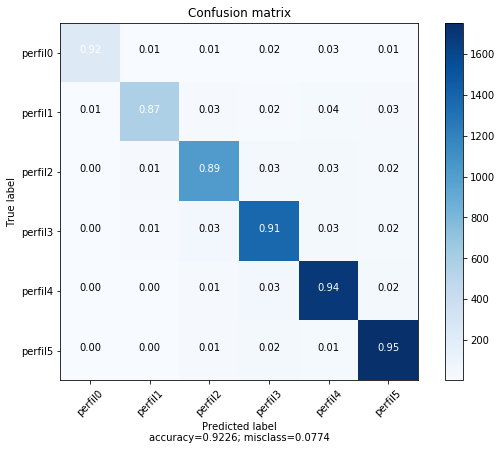

              precision    recall  f1-score   support

     perfil0       0.89      0.92      0.91       239
     perfil1       0.93      0.87      0.90       660
     perfil2       0.91      0.89      0.90      1139
     perfil3       0.91      0.91      0.91      1509
     perfil4       0.93      0.94      0.93      1811
     perfil5       0.94      0.95      0.95      1842

    accuracy                           0.92      7200
   macro avg       0.92      0.92      0.92      7200
weighted avg       0.92      0.92      0.92      7200



In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])


target_names = ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5']
print(classification_report(y_test, y_pred, target_names=target_names))

In [248]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-11 00:01:04--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.6’

    [ <=>                                   ] 87,631      --.-K/s   in 0.002s  

2020-09-11 00:01:04 (41.2 MB/s) - ‘to_be_scored.csv.6’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


In [249]:
df_to_be_scored.Telefono = df_to_be_scored.Telefono.replace({"Samsung  A6": "Samsung", "SAMSUNG A5": "Samsung", "Samsung S3":"Samsung", "Samsung AT":"Samsung", "Samsung Note 4":"Samsung",
                                                                 "Samsung S6":"Samsung","Samsung S6 EDGE":"Samsung","Samsung S7+":"Samsung","Samsung S7":"Samsung","SAMSUNG S6":"Samsung",
                                                                 "Samsung s3":"Samsung","Samsung j5":"Samsung","Samsung Note 2":"Samsung","Samsung A5":"Samsung","Samsung 7+ Edge":"Samsung",
                                                                 "Samsung j":"Samsung","Samsung J5":"Samsung","Samsung  S3":"Samsung","Samsung Note 3":"Samsung","Samsung Note 5":"Samsung",
                                                                 
                                                                 "Iphone  5S":"Iphone","Iphone 6":"Iphone","Iphone 7":"Iphone","Iphone 5S":"Iphone","Iphone S5":"Iphone",
                                                                 "Iphone 6S":"Iphone","Iphone 5":"Iphone","Iphone 7S":"Iphone","Iphone 6S+":"Iphone","Iphone 4S":"Iphone",
                                                                 "Iphone 6s":"Iphone","Iphone 6+":"Iphone","Iphone  6":"Iphone","Iphone ":"Iphone",
                                                                 
                                                                 "HTC M8":"HTC","HTC DES?RE":"HTC","HTC ":"HTC",

                                                                 "LG G4":"LG","LG G3":"LG","LG G2":"LG","LG V10":"LG","L G":"LG",
                                                                 
                                                                 "LeNovo A7000":"Lenovo","LeNovo K5 Vibe":"Lenovo","LeNovo S1 Lite":"Lenovo","LeNovo A7010":"Lenovo",
                                                                 
                                                                 "Asus ZenFone":"Asus","ASUS":"Asus","Asus ZenFone Selfie":"Asus",
                                                                 
                                                                "SONY":"nan","Sony":"nan","SONY Z2":"nan","SONY XPER?A 75":"nan",
                                                                
                                                                "Casper":"nan","Android":"nan","VODEFONE SMART 6":"nan","General Mobile":"nan","Galaxy S4":"nan",
                                                                "Nokia":"nan","Nokia E5":"nan","Reeder":"nan","Xiaomi mi 5":"nan","Xperia":"nan","Smartphone":"nan",
                                                                0:"nan","Huawei 6205":"nan","Genaral Mobile":"nan","General mobile":"nan"," nan":"nan"})

In [250]:
import numpy as np

df_to_be_scored['Genero'] = np.where(df_to_be_scored['Genero'].isna(), df_to_be_scored['Genero'], + pd.Series(pd.factorize(df_to_be_scored['Genero'])[0]).astype('float64'))
df_to_be_scored['Estado_civil'] = np.where(df_to_be_scored['Estado_civil'].isna(), df_to_be_scored['Estado_civil'], + pd.Series(pd.factorize(df_to_be_scored['Estado_civil'])[0]).astype('float64'))
df_to_be_scored['Trabajo'] = np.where(df_to_be_scored['Trabajo'].isna(), df_to_be_scored['Trabajo'], + pd.Series(pd.factorize(df_to_be_scored['Trabajo'])[0]).astype('float64'))
df_to_be_scored['Sector'] = np.where(df_to_be_scored['Sector'].isna(), df_to_be_scored['Sector'], + pd.Series(pd.factorize(df_to_be_scored['Sector'])[0]).astype('float64'))
df_to_be_scored['Telefono'] = np.where(df_to_be_scored['Telefono'].isna(), df_to_be_scored['Telefono'], + pd.Series(pd.factorize(df_to_be_scored['Telefono'])[0]).astype('float64'))
df_to_be_scored['Banca_movil_userfriendly'] = np.where(df_to_be_scored['Banca_movil_userfriendly'].isna(), df_to_be_scored['Banca_movil_userfriendly'], + pd.Series(pd.factorize(df_to_be_scored['Banca_movil_userfriendly'])[0]).astype('float64'))

In [251]:
df_to_be_scored['Telefono'].unique()

array([0.0, 1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0], dtype=object)

In [252]:
df_to_be_scored[['Genero','Estado_civil','Trabajo','Sector','Telefono','Banca_movil_userfriendly']] = df_to_be_scored[['Genero','Estado_civil','Trabajo','Sector','Telefono','Banca_movil_userfriendly']].astype('float64')

In [253]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
ID                                   1000 non-null int64
Genero                               963 non-null float64
Años                                 980 non-null float64
Estado_civil                         976 non-null float64
Trabajo                              864 non-null float64
Sector                               983 non-null float64
Telefono                             927 non-null float64
Anos_usando_internet_banking         977 non-null float64
Anos_usando_banca_movil              945 non-null float64
Banca_movil_userfriendly             1000 non-null float64
Frecuencia_internet_banking_mes      911 non-null float64
Frecuencia_banca_movil_mes           940 non-null float64
Frecuencia_pagamentos_tarjeta_mes    991 non-null float64
Frecuencia_tarjeta_virtual_mes       977 non-null float64
Frecuencia_saldo_cuenta_mes          973 non-null float64
dtypes: float64(14), int

In [254]:
impute_zeros.fit(X=df_to_be_scored)

df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored
    ),
    columns=df_to_be_scored.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3.tail()

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
995,1.0,35.0,0.0,1.0,1.0,4.0,5.0,3.0,1.0,7.0,50.0,1.0,0.0,31.0,5.0
996,1.0,40.0,1.0,5.0,1.0,0.0,10.0,3.0,0.0,0.0,1.0,0.0,15.0,1.0,4.0
997,1.0,30.0,0.0,5.0,0.0,5.0,5.0,3.0,0.0,31.0,31.0,0.0,0.0,4.0,5.0
998,0.0,35.0,0.0,2.0,2.0,0.0,15.0,4.0,1.0,0.0,4.0,1.0,0.0,31.0,4.0
999,1.0,35.0,1.0,5.0,0.0,0.0,0.0,3.0,0.0,30.0,7.0,15.0,15.0,15.0,2.0


In [255]:
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID'], inplace=False)

In [256]:

feature_val = df_to_be_scored_3[
    [
        'Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'
    ]
].columns

In [257]:
#df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [258]:
y_pred = dtc.predict(df_to_be_scored_3)
df_to_be_scored_3['TARGET'] = y_pred
df_to_be_scored_3.tail()

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
995,1.0,35.0,0.0,1.0,1.0,4.0,5.0,3.000000,1.0,7.0,50.0,1.0,0.0,31.000000,2.0
996,1.0,40.0,1.0,5.0,1.0,0.0,10.0,3.639153,0.0,0.0,1.0,0.0,15.0,1.000000,5.0
997,1.0,30.0,0.0,5.0,0.0,5.0,5.0,3.000000,0.0,31.0,31.0,0.0,0.0,10.537513,5.0
998,0.0,35.0,0.0,2.0,2.0,0.0,15.0,4.000000,1.0,0.0,4.0,1.0,0.0,31.000000,3.0
999,1.0,35.0,1.0,5.0,0.0,0.0,0.0,3.639153,0.0,30.0,7.0,15.0,15.0,15.000000,5.0


In [260]:
df_to_be_scored_3.TARGET = df_to_be_scored_3.TARGET.replace({0:"Perfil_0",1:"Perfil_1",2:"Perfil_2",3:"Perfil_3",4:"Perfil_4", 5:"Perfil_5"})

In [261]:
df_to_be_scored_3['TARGET'].value_counts()

Perfil_4    268
Perfil_5    251
Perfil_3    218
Perfil_2    169
Perfil_1     72
Perfil_0     22
Name: TARGET, dtype: int64

In [262]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'bancoppel-donotdelete-pr-2bou7wnole5l1z',
 'asset_id': '22394772-7769-4042-8021-d81e7a65a21e'}